In [59]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [60]:
#df=datasets.load_iris()
#print(df)

In [75]:
features=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','Species']
iris_df=pd.read_csv('iris.csv',names=features)
iris_df.sample(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Species
123,6.3,2.7,4.9,1.8,Iris-virginica
22,4.6,3.6,1.0,0.2,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
48,5.3,3.7,1.5,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa


In [62]:
# Check dimension of data
iris_df.shape

(150, 5)

In [63]:
#Check data Type
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
Species               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [64]:
# No Null values found
iris_df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
Species               0
dtype: int64

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [76]:
X=iris_df.iloc[:,0:4]
y=iris_df.iloc[:,4:5]

In [77]:
#Check the dataset
print(y)
print(X)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
5       Iris-setosa
6       Iris-setosa
7       Iris-setosa
8       Iris-setosa
9       Iris-setosa
10      Iris-setosa
11      Iris-setosa
12      Iris-setosa
13      Iris-setosa
14      Iris-setosa
15      Iris-setosa
16      Iris-setosa
17      Iris-setosa
18      Iris-setosa
19      Iris-setosa
20      Iris-setosa
21      Iris-setosa
22      Iris-setosa
23      Iris-setosa
24      Iris-setosa
25      Iris-setosa
26      Iris-setosa
27      Iris-setosa
28      Iris-setosa
29      Iris-setosa
..              ...
120  Iris-virginica
121  Iris-virginica
122  Iris-virginica
123  Iris-virginica
124  Iris-virginica
125  Iris-virginica
126  Iris-virginica
127  Iris-virginica
128  Iris-virginica
129  Iris-virginica
130  Iris-virginica
131  Iris-virginica
132  Iris-virginica
133  Iris-virginica
134  Iris-virginica
135  Iris-virginica
136  Iris-virginica
137  Iris-virginica


### Find the distribution of target variable (Class) (1 Marks)

In [83]:
#iris_df

In [84]:
#Converting the Species column into categorical value
for feature in iris_df.columns: # Loop through all columns in the dataframe
    if iris_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        iris_df[feature] = pd.Categorical(iris_df[feature]).codes # Replace strings with an integer
        
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
Species               150 non-null int8
dtypes: float64(4), int8(1)
memory usage: 4.9 KB


In [85]:
iris_df.groupby('Species').count()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
Species,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


### Plot the distribution of target variable using histogram

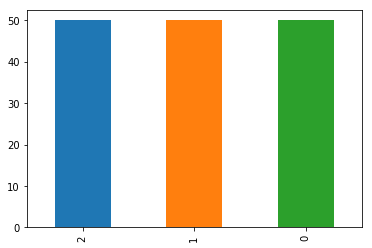

In [86]:
iris_df['Species'].value_counts().plot.bar()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [87]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E072CF8>,
      dtype=object)

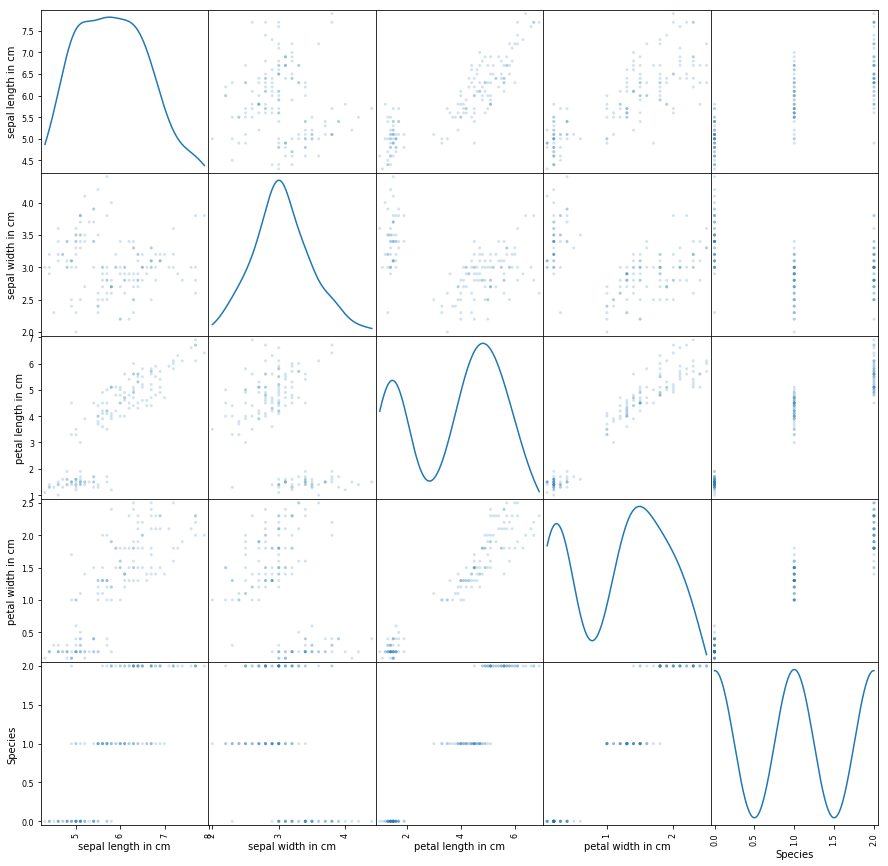

In [93]:
scatter_matrix(iris_df, alpha=0.2, figsize=(15, 15), diagonal='kde')

In [90]:
print("From the scatter matrix , we can see that the sepal length and width are normally ditributed whereas petal length and\
   width are show some classifications ")

From the scatter matrix , we can see that the sepal length and width are normally ditributed whereas petal length and   width are show some classifications 


### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [91]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length in cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width in cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length in cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width in cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
print("There seems to be some deviation between the mean and median of petal length and width.")

In [ ]:
#Drop Id variable from data
#nothing to do in this

### Correlation among all variables and give your insights (1 Marks)

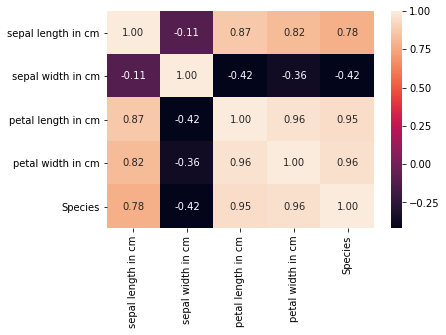

In [95]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
import seaborn as sns

corr=iris_df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','Species']].corr()
sns.heatmap(corr,annot=True,fmt='0.2f')

### Split data in Training and Validation in 80:20 (1 Marks)

In [96]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 1)

### Do Feature Scaling ( 1 Marks)

In [97]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(iris_df)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00, -1.22474487e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00, -1.22474487e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00

### Train and Fit NaiveBayes Model(2 Marks)

In [98]:
#Fit the model
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [99]:
#Predict
model.score(X_test,y_test)

0.9666666666666667

In [104]:
y_predict = model.predict(X_test)


### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [108]:
# show Confusion Matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test,y_predict))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [109]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9666666666666667

In [110]:
#Show precision and Recall metrics
print(metrics.classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30

